In [17]:
import tensorflow as tf
import os
import glob as gb
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [18]:
data_path='/kaggle/input/handwritten-characters/Validation/'

In [19]:
for folder in os.listdir(data_path):
    jpg_files = gb.glob(pathname=str(data_path+ folder + '/*.jpg'))
    png_files = gb.glob(pathname=str(data_path + folder + '/*.png'))
    files = jpg_files + png_files
    print(f'For data, found {len(files)} in folder {folder}')

For data, found 235 in folder N
For data, found 190 in folder 7
For data, found 366 in folder R
For data, found 1267 in folder 2
For data, found 385 in folder B
For data, found 381 in folder I
For data, found 324 in folder F
For data, found 343 in folder H
For data, found 1388 in folder 5
For data, found 520 in folder &
For data, found 308 in folder E
For data, found 210 in folder U
For data, found 251 in folder M
For data, found 1198 in folder 8
For data, found 119 in folder X
For data, found 368 in folder 0
For data, found 1300 in folder #
For data, found 240 in folder K
For data, found 405 in folder Q
For data, found 189 in folder Y
For data, found 168 in folder S
For data, found 363 in folder G
For data, found 392 in folder A
For data, found 384 in folder T
For data, found 224 in folder V
For data, found 181 in folder Z
For data, found 1250 in folder @
For data, found 1301 in folder 3
For data, found 1675 in folder 1
For data, found 168 in folder C
For data, found 1277 in folder 4


In [20]:
code = {'0':0 ,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,'#':10,'$':11 ,'&':12,'@':13,'A':14,'B':15,'C':16,'D':17,'E':18,'F':19,'G':20,'H':21,'I':22 ,'J':23,'K':24,'L':25,'M':26,'N':27,'P':28,'Q':29,'R':30,'S':31,'T':32,'U':33 ,'V':34,'W':35,'X':36,'Y':37,'Z':38}
def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x

In [21]:
def load_data(data_path):
    x = []
    y = []
    s = 32
    class_labels = {}  # Dictionary to store class labels
    label = 0  # Initialize label counter
    
    for class_dir in os.listdir(data_path):
        class_path = os.path.join(data_path, class_dir)
        if os.path.isdir(class_path):
            if class_dir not in class_labels:
                class_labels[class_dir] = label
                label += 1
            
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                image = cv2.imread(image_path)
                if image is not None:
                    image = cv2.resize(image, (s, s))  # Resize to fixed size
                    x.append(image)
                    y.append(class_labels[class_dir])
    return np.array(x), np.array(y)

In [22]:
x, y = load_data(data_path)

In [23]:

# Normalize the image data to [0, 1]
#x = x.astype('float32') / 255.0

# One-hot encode the labels
#num_classes = 39  # Number of classes
#y = to_categorical(y, num_classes=num_classes)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [25]:
print(f'we have {len(x_train)} items in X_train')

we have 12612 items in X_train


In [26]:
print(f'we have {len(x_test)} items in x_test')

we have 6758 items in x_test


In [27]:
print(f'we have {len(x_val)} items in x_val')

we have 3154 items in x_val


In [28]:
model = Sequential([
    Conv2D(265, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(39, activation='softmax')
])

In [29]:
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 265)    │         7,420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 30, 30, 265)    │         1,060 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 265)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 128)    │       305,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 4, 4, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 2, 2, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 2, 2, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 39)             │        10,023 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 425,511 (1.62 MB)

 Trainable params: 424,533 (1.62 MB)

 Non-trainable params: 978 (3.82 KB)

In [30]:
epochs = 30
ThisModel = model.fit(x_train, y_train,validation_data=(x_val, y_val),epochs=epochs)

Epoch 1/30
 30/395 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1593 - loss: 3.5361

I0000 00:00:1719067102.095857    2580 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.5265 - loss: 1.9311 - val_accuracy: 0.8443 - val_loss: 0.5124
Epoch 2/30
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8310 - loss: 0.5678 - val_accuracy: 0.8941 - val_loss: 0.3625
Epoch 3/30
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8804 - loss: 0.3780 - val_accuracy: 0.8798 - val_loss: 0.4103
Epoch 4/30
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9081 - loss: 0.2977 - val_accuracy: 0.9217 - val_loss: 0.2714
Epoch 5/30
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9238 - loss: 0.2332 - val_accuracy: 0.9239 - val_loss: 0.2565
Epoch 6/30
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9185 - loss: 0.2506 - val_accuracy: 0.9299 - val_loss: 0.2593
Epoch 7/30
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9344 - loss: 0.2051 - val_accuracy: 0.9264 - val_loss: 0.2671
Epoch 8/30
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9490 - loss: 0.1495 - val_accuracy: 0.9283 - va

In [31]:
ModelLoss, ModelAccuracy = model.evaluate(x_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

212/212 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9307 - loss: 0.3301
Test Loss is 0.3226119577884674
Test Accuracy is 0.9362237453460693


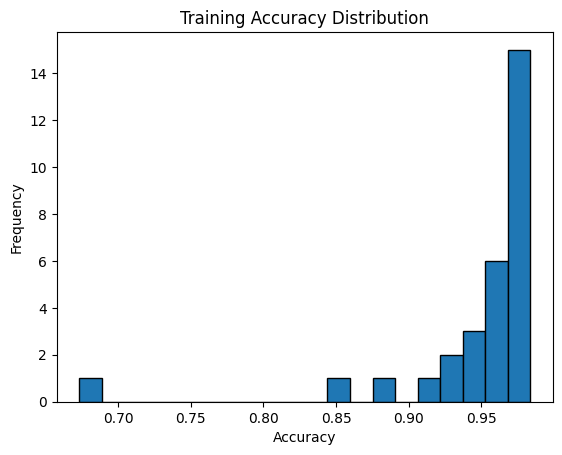

In [38]:
plt.hist(ThisModel.history['accuracy'], bins=20, edgecolor='black')
plt.title('Training Accuracy Distribution')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

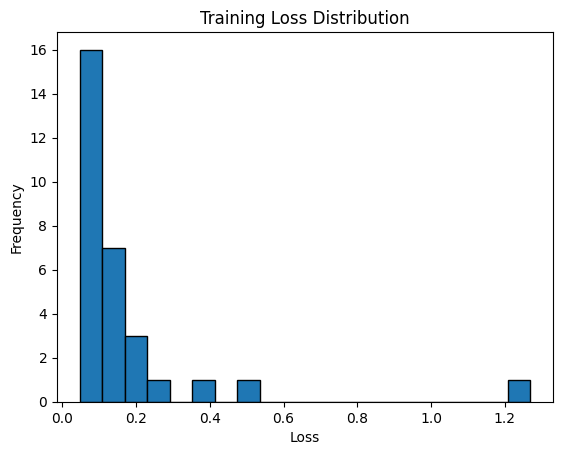

In [39]:
plt.hist(ThisModel.history['loss'], bins=20, edgecolor='black')
plt.title('Training Loss Distribution')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.show()

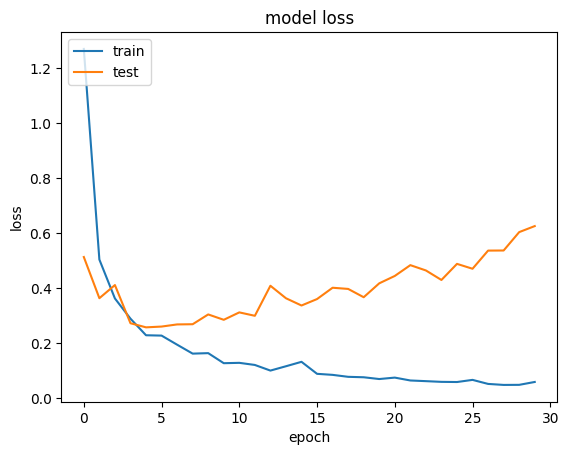

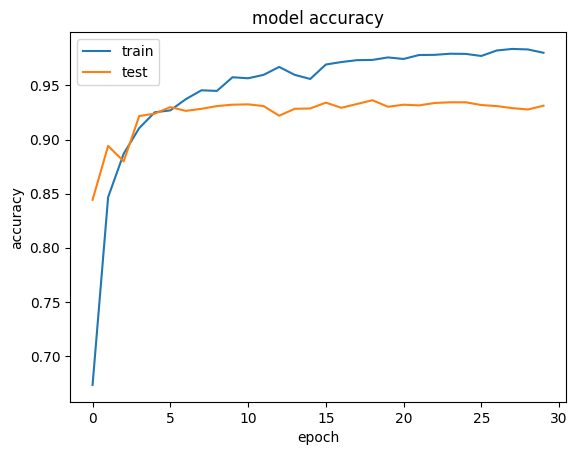

In [40]:
plt.plot(ThisModel.history['loss'])
plt.plot(ThisModel.history['val_loss'])
plt.title('model loss')
plt.legend(['train', 'test'], loc='upper left')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.figure()
plt.plot(ThisModel.history['accuracy'])
plt.plot(ThisModel.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
# Save the model to a writable directory
save_model = '/kaggle/working/English_letter_model.h5'
model.save(save_model)
print(f"Model saved as {save_model}")

Model saved as /kaggle/working/English_letter_model.h5


In [42]:
# Load the model from the saved path
loaded_model = tf.keras.models.load_model(save_model)
print("Model loaded successfully")

Model loaded successfully


In [43]:
loaded_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 265)    │         7,420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 30, 30, 265)    │         1,060 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 265)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 128)    │       305,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 4, 4, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 2, 2, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 2, 2, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 39)             │        10,023 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 425,513 (1.62 MB)

 Trainable params: 424,533 (1.62 MB)

 Non-trainable params: 978 (3.82 KB)

 Optimizer params: 2 (12.00 B)